# Deep Neural Networks in Python

**Jessica Cervi**

## Activity Overview 

The term deep neural networks (DNNs) broadly refers to any kind of neural network with many layers, assembled in order to achieve some larger task.

In this activity, we'll first explore how to assemble a simplified version of a DNN using the familiar MNIST digits dataset. We will train our network and measure its accuracy to see if it makes a correct prediction.

This activity is designed to help you apply the machine learning algorithms you have learned using the packages in `Python`. `Python` concepts, instructions, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the activity. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the activity, we encourage you to compare your work against the solution file to perform a self-assessment.

## Index:

#### Week 3:  Deep Neural Networks

- [Part 1](#part1) - Deep Neural Networks
- [Part 2](#part2) - Setting up the Problem
- [Part 3](#part3) - Creating the Model
- [Part 4](#part4) - Compiling the Model 
- [Part 5](#part5) - Training the Model

[Back to top](#Index:) 

<a id='part1'></a>

# Deep Neural Networks <a></a>

Deep learning is becoming a very popular subset of machine learning due to its high level of performance across many types of data. One of the most typical uses of deep learning to classify images is to build a deep neural network (DNN). 

Computers see images using pixels. Pixels in images are usually related, particularly to other nearby pixels. For example, a certain group of pixels may signify an edge in an image, a particular texture, or some other pattern. Convolutions use this to help identify and classify these images.

For example, to achieve image classification using DNNs, we may use a sequence of convolution, ReLU and pooling layers, whose purpose is to essentially learn and extract relevant features from the image. 

That might then be combined with a flatten operation and a sequence of fully connected layers, culminating in some output, for example, using a softmax activation function at the end to indicate the “best” choice among several possible classes for the image.

In this activity, we will use a simplified DNN consisting  of only three layers: a convolution, a flattening layer, and a softmax activation. Details about each of these layes will be given in the next sections of this activity.


<img src="steps.png" alt="Drawing" style="width: 700px;"/>

### Convolutional layers in Python with Keras

Since we are going to work with images,  it's a good idea to use a DNN.
In a similar way as we did for the coding activity about autoencoders, we will use the Python library [Keras](https://keras.io) to set up and build our problem.

[Back to top](#Index:) 

<a id='part2'></a>

## Setting up the Problem <a></a>

Again. we will be using the [`MNIST`](https://en.wikipedia.org/wiki/MNIST_database) database for our model.
The MNIST database contains images of handwritten digits 0 through 9  normalized to fit into a 28x28 pixel bounding box.
The MNIST dataset can be conveniently imported through `Keras`. 

Run the code cell below to import some of the libraries we will use in this exercise.

In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

Run the code cell below to import the data.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 4s 0us/step
(60000,) (10000,)


Now let’s take a look at one of the images in our dataset to see what we're working with. We will plot the first image in our dataset using `matplotlib`.

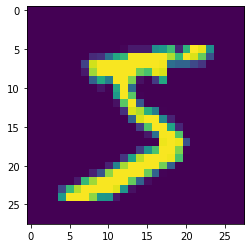

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0]);

Run the code below to check the size of the image.

In [4]:
#check image shape
X_train[0].shape

(28, 28)

By default, the shape of every image in the MNIST dataset is 28x28, so we will not need to check the shape of all the images. When using real-world datasets, you may not be so lucky. 28x28 is also a fairly small size, so the DNN will be able to run over each image pretty quickly.

### Preparing the Data

The first step in this activity is to prepare the data before feeding it to our DNN.
We will do this by reshaping each image from (28, 28) to (28, 28, 1) because `Keras` requires the third dimension. Note that this structure is sometimes referred to as a "tensor" in which there may be multiple "depth" channels; this terminology gives us some insight into the naming of the `TensorFlow` tool that `Keras` provides an interface to.

Run the code cell below.

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In the code below, fill in the ellipsis to reshape the `X_test` set using the same dimensions we have used for `X_train`.

In [7]:
X_test = X_test.reshape(10000,28,28,1)


As a final step of our data preparation, we need to ‘one-hot-encode’ our target variable. To achieve this, we will be using the function [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) from the `Keras` module `utils`.

This means that a column will be created for each output category and a separate binary variable is created for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array (corresponding to the sixth possible digit type counting from 0) will have a 1 and the rest of the array will be filled with 0.

In [8]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print("y_train[0]:", y_train[0])
print("y_train_onehot[0]:", y_train_onehot[0])

y_train[0]: 5
y_train_onehot[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[Back to top](#Index:) 

<a id='part3'></a>

## Creating the Model <a></a>

Now we are ready to build our model.

The model type that we will be using is Sequential. The `Keras` class [`sequential`](https://keras.io/api/models/sequential/) is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

In the code below, fill in the ellipsis so that `num_filters`, `filter_size`, and `pool_size` are equal to 8, 3, and 2, respectively.



In [9]:
from keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#set up parameters for the model
num_filters = 8
filter_size = 3
pool_size = 2

We use the `add()` function to add layers to our model.

Our first layer is a Conv2D layer. This is a convolution layer that will deal with our input images, which are seen as 2-dimensional matrices. In the code cell below, 8 is the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. Our first layer also takes in the shape of an input. The shape of each input image is 28,28,1, as seen earlier, with the 1 signifying that the images are greyscale.

Next, we add a pooling layer by using the function [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/). Pooling is usually employed as an important strategy to achieve high performance in image classification. It works by taking the maximum value in a region around each pixel, as given by the `pool_size` variable. 

In between the `Conv2D` layers and the dense layer, there is a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer. Flatten serves as a connection between the convolution and dense layers, converting higher-dimensional data into a single 1-dimensional vector as needed by a dense layer.

Finally, as we have seen for autoencoders, `Dense` is the layer type that we will use for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

We will have 10 nodes in our output layer, one for each possible outcome (0–9).
The activation is "softmax". Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on whichever option or class has the highest probability.

In [10]:
#defining the model
model = Sequential()

#add model layers
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

[Back to top](#Index:) 

<a id='part4'></a>

## Compiling the Model <a></a>

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss, and metrics.

The optimizer controls the learning rate. We will be using `adam` as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but as we saw, the time it takes to compute the weights will be longer.

We will use `'categorical_crossentropy'` for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
To make things even easier to interpret, we will use the `'accuracy'` metric to see the accuracy score on the validation set when we train the model.

In the code cell, fill in the ellipsis to set the argument `loss` equal to `'categorical_crossentropy'`.

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[Back to top](#Index:) 

<a id='part5'></a>

## Training the Model <a></a>


Now, we will train our model. 

We will train the data in a similar way as we did for autoencoders.


For our validation data, we will use the test set provided to us in our dataset, which we have processed into `X_test` and `y_test_onehot`.
The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve up to a certain point. After that point, the model will stop improving during each epoch. 

For efficiency, in our model below we will set the number of epochs to 3.

Run the code cell below.

In [12]:
#train the model
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=3);

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 2.3873 - accuracy: 0.8917 - val_loss: 0.7592 - val_accuracy: 0.9211
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3932 - accuracy: 0.9414 - val_loss: 0.3415 - val_accuracy: 0.9407
Epoch 3/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2449 - accuracy: 0.9499 - val_loss: 0.2546 - val_accuracy: 0.9517


**Question**

What is the accuracy of our model after 3 epochs? Round your answer to two decimal digits.

95.17%


### Making Predictions

If you want to see the actual predictions that our model has made for the test data, we can use the [`predict` ](https://www.tensorflow.org/api_docs/python/tf/keras/Model) function. 

The predict function will give an array with 10 numbers. 
Note that these numbers are the probabilities that the input image represents each respective digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

In [13]:
#predict all images in the test set, and look at first 4
pred_probs = model.predict(X_test)
pred_probs[:4]

array([[3.6365697e-18, 3.1769081e-19, 2.0355354e-10, 5.5570726e-10,
        4.2699961e-14, 4.2122250e-17, 3.2271563e-28, 1.0000000e+00,
        8.6690068e-14, 9.8199719e-11],
       [2.4969959e-12, 7.5684788e-12, 1.0000000e+00, 1.5889869e-11,
        9.5199150e-18, 6.7047741e-09, 7.1094917e-09, 2.2752326e-23,
        3.7693931e-11, 6.5715597e-23],
       [1.9788970e-09, 9.9990594e-01, 5.1786548e-05, 3.4336985e-08,
        9.7874363e-06, 6.3000917e-11, 7.0775572e-09, 2.4565705e-07,
        3.2204498e-05, 6.1342460e-09],
       [1.0000000e+00, 3.1573946e-20, 8.7555969e-11, 6.2763884e-17,
        1.0455632e-15, 4.0654887e-16, 5.3483110e-11, 3.4695543e-15,
        1.2488960e-14, 1.4896205e-15]], dtype=float32)

**Question**

What is the predicted digit type of the last image shown above?.

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**


Finally, let’s compare this with the actual results. It's a little easier if we first convert our prediction probabilities into the corresponding class label. We can use `argmax` for that, to find the label with the maximum probability.

In [14]:
pred_classes = np.argmax(pred_probs,axis=1)
pred_classes[:4]

array([7, 2, 1, 0])

In [15]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

Great, our model predicted the labels of the first four images correctly!